In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Part-1: Data Exploration and Pre-processing

1)load the given dataset

In [3]:
df=pd.read_csv('Python_Project_7_KNN.csv')

2)Check for the null values

In [5]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

3)Get basic information from data 

In [4]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total_Work_Experience       8995 non-null   int64  
 2   Number_of_years_in_city     8995 non-null   int64  
 3   Cost_to_Request_Ratio       8995 non-null   float64
 4   Cibil_score                 8995 non-null   int64  
 5   Overdrafts_past12months     8995 non-null   int64  
 6   Total_bounces_past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [38]:
df.shape

(8995, 7)

4)Describe the dataset 

In [8]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [15]:
df.columns=df.columns.str.replace(' ','_')

In [17]:
df.columns

Index(['Age', 'Total_Work_Experience', 'Number_of_years_in_city',
       'Cost_to_Request_Ratio', 'Cibil_score', 'Overdrafts_past12months',
       'Total_bounces_past12months'],
      dtype='object')

5)Display scatterplot between age & Total work Experience 

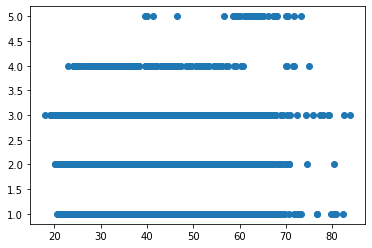

In [12]:
plt.scatter(df.Age,df.Total_Work_Experience)

6)Display box plot for age

{'whiskers': [<matplotlib.lines.Line2D at 0x22d96399160>,
 'caps': [<matplotlib.lines.Line2D at 0x22d9639b820>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d96395d00>],
 'medians': [<matplotlib.lines.Line2D at 0x22d963a4df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d9639d340>],
 'means': []}

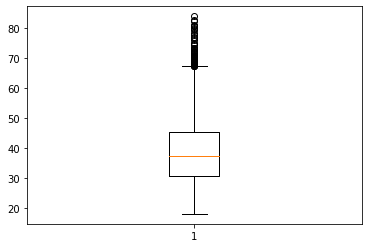

In [13]:
plt.boxplot(df.Age)

7)Display box plot for Cibil score 

{'whiskers': [<matplotlib.lines.Line2D at 0x22d963dc100>,
 'caps': [<matplotlib.lines.Line2D at 0x22d96370190>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d94f68910>],
 'medians': [<matplotlib.lines.Line2D at 0x22d963bfdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d963e1370>],
 'means': []}

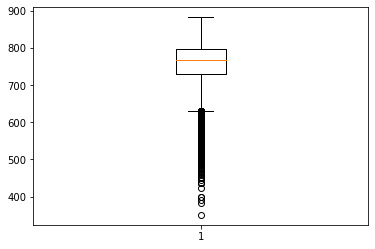

In [14]:
plt.boxplot(df.Cibil_score)

8)Create target and features data where target is Total bounces past12months

In [18]:
x=df.drop('Total_bounces_past12months',axis=1)b


In [19]:
y=df.Total_bounces_past12months

In [20]:
x.shape

(8995, 6)

In [21]:
y.shape

(8995,)

# Part-2: Working with Model 

1)Split data into training and testing sets

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=90)

2)Create a KNN classifierbetween Features and target data

In [24]:
kn=KNeighborsClassifier()

In [25]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

3)Display the test score 

In [26]:
kn.score(X_test,y_test)

0.6703724291272929

4)Display the training score 

In [27]:
kn.score(X_train,y_train)

0.6742634797109506

5)Print the accuracy score

In [28]:
y_pred=kn.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.6703724291272929

6)Try 1 to 14 k values for classifier 

In [34]:
test_scores=[]
train_scores=[]

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))

7)Display training and testing score for all the 1 to 14k values

C:\Users\dhava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


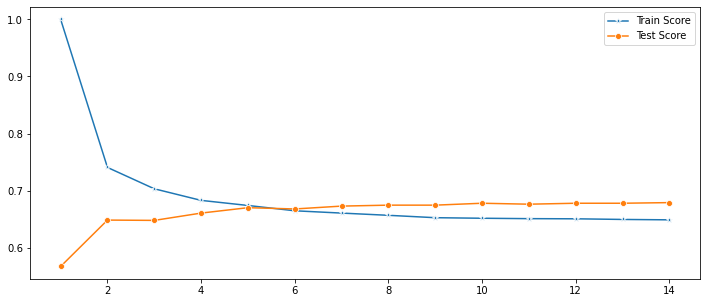

In [35]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')